In [35]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np

# Import data file "PubChem AID 411"
# Only following columns are neccesary:
# PUBCHEM_SID & PUBCHEM_CID
# PUBCHEM_ACTIVITY_OUTCOME
# PUBCHEM_ACTIVITY_SCORE
df = pd.read_csv('AID_411_datatable_all.csv', sep=',', 
                 skiprows=(lambda x: x in range(1, 6)), 
                 encoding = 'ISO-8859-1')

df = df.filter(['PUBCHEM_SID','PUBCHEM_CID','PUBCHEM_ACTIVITY_OUTCOME','PUBCHEM_ACTIVITY_SCORE'], axis=1)

print(df.shape)

df.head(5)

(72359, 4)


,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE
0,842121,6603008.0,Inactive,0
1,842122,6602571.0,Inactive,0
2,842123,6602616.0,Inactive,0
3,842124,644371.0,Inactive,0
4,842125,6603132.0,Inactive,0


In [2]:
df[df.PUBCHEM_CID.isnull()]

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE
43562,4252974,NaN,Inactive,0
43667,4253080,NaN,Inactive,0
43677,4253090,NaN,Inactive,0
44135,4253551,NaN,Inactive,0
44518,4253935,NaN,Inactive,0
44519,4253936,NaN,Inactive,0
44520,4253937,NaN,Inactive,0
44521,4253938,NaN,Inactive,0
44522,4253939,NaN,Inactive,0
44523,4253940,NaN,Inactive,0


In [3]:
# 25 CIDs are missing. Delete this data (all 25 molecules are inactive).

df['PUBCHEM_CID'].replace('', np.nan, inplace=True)
df.dropna(subset=['PUBCHEM_CID'], inplace=True)

print(df.shape)

(72334, 4)


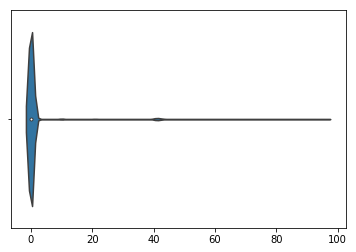

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot([df.PUBCHEM_ACTIVITY_SCORE]);

In [5]:
import pubchempy as pcp

CIDs = list(np.array(df['PUBCHEM_CID'].values).astype(int))

df_SMILES = pd.DataFrame()

for i in range (0,8):
    CID_junk = CIDs[i*10000:i*10000+10000]

    df_tmp = pcp.get_properties(['isomeric_smiles', ], CID_junk , 
                             namespace='cid', as_dataframe=True)
    
    df_SMILES = df_SMILES.append(df_tmp)
    
df_SMILES.shape   

(72334, 1)

In [6]:
df.head(5)

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE
0,842121,6603008.0,Inactive,0
1,842122,6602571.0,Inactive,0
2,842123,6602616.0,Inactive,0
3,842124,644371.0,Inactive,0
4,842125,6603132.0,Inactive,0


In [7]:
# Inserst df_SMILES into df.
# Then clean SMILES. Sometimes counter ions or accompanying substances are included.

# Idea: Parse strings end remove after point '.'

df.insert(loc=2, column='SMILES', value=df_SMILES.values)

for i in df.index:
    df.at[i, 'SMILES'] = df.at[i, 'SMILES'].rsplit('.', 1)[0]

#'CCOCCCNCC(=O)NC1=CC=C(C=C1)OC(F)(F)F.Cl'.rstrip('.')

In [8]:
df.head(5)

,PUBCHEM_SID,PUBCHEM_CID,SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE
0,842121,6603008.0,CCOCCCNCC(=O)NC1=CC=C(C=C1)OC(F)(F)F,Inactive,0
1,842122,6602571.0,COCCN1C(=NN=N1)CN2CCC(CC2)CC3=CC=CC=C3,Inactive,0
2,842123,6602616.0,COCCN1C(=NN=N1)CN2CCC(CC2)(C3=CC(=CC=C3)C(F)(F...,Inactive,0
3,842124,644371.0,C1CCCN(CC1)CC(=O)NCCC2=CC=C(C=C2)F,Inactive,0
4,842125,6603132.0,COC1=CC=C(C=C1)C(=O)C(C2=CC=CC=C2)N3CCOCC3,Inactive,0


In [9]:
# Check target vector
df.groupby('PUBCHEM_ACTIVITY_OUTCOME').count()

,PUBCHEM_SID,PUBCHEM_CID,SMILES,PUBCHEM_ACTIVITY_SCORE
PUBCHEM_ACTIVITY_OUTCOME,,,,
Active,1577,1577,1577,1577
Inactive,70072,70072,70072,70072
Inconclusive,685,685,685,685


In [10]:
#sns.distplot(df.PUBCHEM_ACTIVITY_SCORE, kde=False);


df.groupby('PUBCHEM_ACTIVITY_SCORE').count()

,PUBCHEM_SID,PUBCHEM_CID,SMILES,PUBCHEM_ACTIVITY_OUTCOME
PUBCHEM_ACTIVITY_SCORE,,,,
0,70072,70072,70072,70072
10,383,383,383,383
20,82,82,82,82
21,170,170,170,170
22,41,41,41,41
23,8,8,8,8
24,1,1,1,1
40,175,175,175,175
41,594,594,594,594


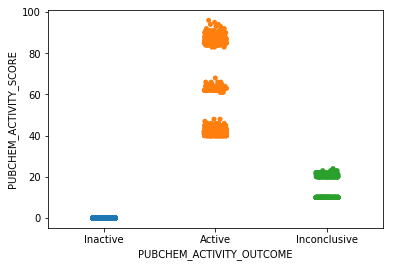

In [11]:
sns.stripplot(x='PUBCHEM_ACTIVITY_OUTCOME', y='PUBCHEM_ACTIVITY_SCORE', data=df, jitter=True);

In [12]:
# Create y based on PUBCHEM_ACTIVITY_OUTCOME
# Molecules with 'inconclusive' output are removed from df first

print(df.shape)

df.drop(df[df.PUBCHEM_ACTIVITY_OUTCOME =='Inconclusive'].index, inplace=True)

print(df.shape)

y = np.where(df['PUBCHEM_ACTIVITY_OUTCOME']=='Active', '1', '0')
y = y.astype(int)
print(y.shape)
y

(72334, 5)
(71649, 5)
(71649,)


array([0, 0, 0, ..., 0, 0, 1])

In [13]:
# Featurize SMILES

# Available Featurizer by DeppChem:
# ConvMolFeaturizer
# WeaveFeaturizer
# CircularFingerprint
# RDKitDescriptors
# CoulombMatrix
# CoulombMatrixEig
# BPSymmetryFunction
# AdjacencyFingerprint



import warnings; warnings.simplefilter('ignore')
import deepchem as dc

df.SMILES.to_csv('data.csv', header=True)

def featurize_SMILES (dataset_file, smiles_field, featurizer_func):
    loader = dc.data.CSVLoader(tasks=[], smiles_field=smiles_field, 
                               featurizer=featurizer_func, log_every_n=10000)
    dataset = loader.featurize(dataset_file)
    return pd.DataFrame(dataset.X)

df_features = featurize_SMILES('data.csv', 'SMILES', dc.feat.CircularFingerprint())
df_features.head(5)

Instructions for updating:
Use the retry module or similar alternatives.
Loading raw samples now.
shard_size: 8192
About to start loading CSV from data.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 55.346 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 1 took 41.200 s
Loading shard 3 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 2 too

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#df_features.isnull().sum().sum()

In [15]:
#df_features.isnull().sum()

In [16]:
# Mit dc.feat.RDKitDescriptors() sind in Spalten 9,10,11,12 je 50 Nan's
# Quick fix: drop columns

#print(df_features.shape)

#df_features.drop(labels=[9,10,11,12], axis=1, inplace=True)

#print(df_features.shape)


In [17]:
from imblearn.over_sampling import RandomOverSampler 

cnn = RandomOverSampler(random_state=42) 
X_res, y_res = cnn.fit_sample(df_features, y)

print(X_res.shape, y_res.shape)

(140144, 2048) (140144,)


In [18]:
import warnings; warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=test_size, 
                                                    stratify=y_res, random_state=42)


# For a single-input model with 2 classes (binary classification):
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
Dropout(0.7, noise_shape=None, seed=None)
model.add(Dense(256, activation='relu'))
Dropout(0.7, noise_shape=None, seed=None)
model.add(Dense(256, activation='relu'))
Dropout(0.7, noise_shape=None, seed=None)
model.add(Dense(32, activation='relu'))
Dropout(0.7, noise_shape=None, seed=None)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'categorical_accuracy',])

#This is for model evaluation via Tensorboard
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, 
                         write_graph=True, write_images=True, write_grads = 100)

# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, 
          verbose=1, callbacks=[tbCallBack])

model.evaluate(X_test, y_test)

Using TensorFlow backend.


Train on 88290 samples, validate on 9810 samples
Epoch 1/10
88290/88290 [==============================] - 577s 7ms/step - loss: 0.1045 - acc: 0.9632 - categorical_accuracy: 1.0000 - val_loss: 0.0417 - val_acc: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2/10
88290/88290 [==============================] - 546s 6ms/step - loss: 0.0253 - acc: 0.9936 - categorical_accuracy: 1.0000 - val_loss: 0.0348 - val_acc: 0.9931 - val_categorical_accuracy: 1.0000
Epoch 3/10
88290/88290 [==============================] - 550s 6ms/step - loss: 0.0156 - acc: 0.9962 - categorical_accuracy: 1.0000 - val_loss: 0.0398 - val_acc: 0.9902 - val_categorical_accuracy: 1.0000
Epoch 4/10
88290/88290 [==============================] - 525s 6ms/step - loss: 0.0091 - acc: 0.9980 - categorical_accuracy: 1.0000 - val_loss: 0.0452 - val_acc: 0.9914 - val_categorical_accuracy: 1.0000
Epoch 5/10
88290/88290 [==============================] - 535s 6ms/step - loss: 0.0078 - acc: 0.9982 - categorical_accuracy: 1.0000 - v

[0.01917462345326069, 0.9976691085529446, 1.0]

[[20924    98]
 [    0 21022]]


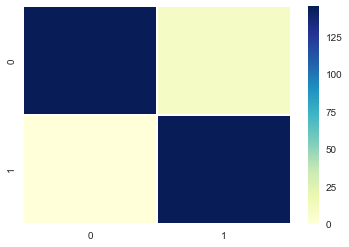

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

y_pred = model.predict_classes(X_test)
data = confusion_matrix(y_test, y_pred)

print(data)

sns.heatmap(np.sqrt(data), 
            #annot=True, fmt="f", 
            linewidths=.5, cmap="YlGnBu");

(364105, 4)


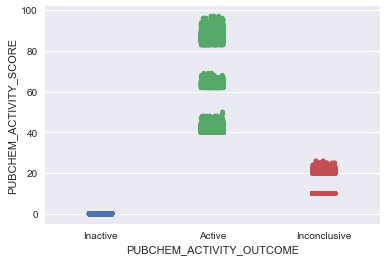

In [23]:
# Import data file "PubChem AID 588342" and use for validation
# Only following columns are neccesary:
# PUBCHEM_SID & PUBCHEM_CID
# PUBCHEM_ACTIVITY_OUTCOME
# PUBCHEM_ACTIVITY_SCORE
df_val = pd.read_csv('AID_588342_datatable_all.csv', sep=',', 
                 skiprows=(lambda x: x in range(1, 6)), 
                 encoding = 'ISO-8859-1')

df_val = df.filter(['PUBCHEM_SID','PUBCHEM_CID','PUBCHEM_ACTIVITY_OUTCOME','PUBCHEM_ACTIVITY_SCORE'], axis=1)

print(df.shape)

sns.stripplot(x='PUBCHEM_ACTIVITY_OUTCOME', y='PUBCHEM_ACTIVITY_SCORE', data=df_val, jitter=True);

In [25]:
df_val.groupby('PUBCHEM_ACTIVITY_OUTCOME').count()

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_SCORE
PUBCHEM_ACTIVITY_OUTCOME,,,
Active,25159,25159,25159
Inactive,304600,304590,304600
Inconclusive,34346,34346,34346


In [26]:
df_val[df_val.PUBCHEM_CID.isnull()]

,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE
60998,7975574,NaN,Inactive,0
364096,124894526,NaN,Inactive,0
364097,124894527,NaN,Inactive,0
364098,124894528,NaN,Inactive,0
364099,124894529,NaN,Inactive,0
364100,124894530,NaN,Inactive,0
364101,124894531,NaN,Inactive,0
364102,124894532,NaN,Inactive,0
364103,124894533,NaN,Inactive,0
364104,124894534,NaN,Inactive,0


In [31]:
# 10 CIDs are missing. Delete this data (all 25 molecules are inactive).
print(df_val.shape)

df_val['PUBCHEM_CID'].replace('', np.nan, inplace=True)
df_val.dropna(subset=['PUBCHEM_CID'], inplace=True)

print(df_val.shape)

(364095, 4)
(364095, 4)


In [33]:
# Create y based on PUBCHEM_ACTIVITY_OUTCOME
# Molecules with 'inconclusive' output are removed from df first

print(df_val.shape)

df_val.drop(df_val[df_val.PUBCHEM_ACTIVITY_OUTCOME =='Inconclusive'].index, inplace=True)

print(df_val.shape)

(329749, 4)
(329749, 4)


In [40]:
#Find unique entries in df_val compared to df and saves in df_val_unique

#df_val['istin']= df_val.PUBCHEM_CID.isin(df.PUBCHEM_CID).astype(np.int8)

df_val_unique = df_val[~df_val['PUBCHEM_CID'].isin(df['PUBCHEM_CID'])].drop_duplicates()
df_val_unique.shape

(272059, 4)

In [45]:
import pubchempy as pcp

CIDs = list(np.array(df_val_unique['PUBCHEM_CID'].values).astype(int))

df_SMILES_val = pd.DataFrame()

for i in range (0,28):
    CID_junk = CIDs[i*10000:i*10000+10000]

    df_tmp = pcp.get_properties(['isomeric_smiles', ], CID_junk , 
                             namespace='cid', as_dataframe=True)
    
    df_SMILES_val = df_SMILES_val.append(df_tmp)
    
df_SMILES_val.shape 

(272059, 1)

In [46]:
# Inserst df_SMILES into df.
# Then clean SMILES. Sometimes counter ions or accompanying substances are included.

# Idea: Parse strings end remove after point '.'

df_val_unique.insert(loc=2, column='SMILES', value=df_SMILES_val.values)

for i in df_val_unique.index:
    df_val_unique.at[i, 'SMILES'] = df_val_unique.at[i, 'SMILES'].rsplit('.', 1)[0]

#'CCOCCCNCC(=O)NC1=CC=C(C=C1)OC(F)(F)F.Cl'.rstrip('.')

In [47]:
# Featurize SMILES

# Available Featurizer by DeppChem:
# ConvMolFeaturizer
# WeaveFeaturizer
# CircularFingerprint
# RDKitDescriptors
# CoulombMatrix
# CoulombMatrixEig
# BPSymmetryFunction
# AdjacencyFingerprint



import warnings; warnings.simplefilter('ignore')
import deepchem as dc

df_val_unique.SMILES.to_csv('data_val.csv', header=True)

def featurize_SMILES (dataset_file, smiles_field, featurizer_func):
    loader = dc.data.CSVLoader(tasks=[], smiles_field=smiles_field, 
                               featurizer=featurizer_func, log_every_n=10000)
    dataset = loader.featurize(dataset_file)
    return pd.DataFrame(dataset.X)

df_features_val = featurize_SMILES('data_val.csv', 'SMILES', dc.feat.CircularFingerprint())
df_features_val.head(5)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from data_val.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 108.013 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 1 took 108.237 s
Loading shard 3 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 2 took 108.755 s
Loading shard 4 of size 8192.
Featurizing sample 0
Feat

Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 28 took 106.290 s
Loading shard 30 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 29 took 105.230 s
Loading shard 31 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 30 took 106.924 s
Loading shard 32 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing samp

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Set y_val

y_val = np.where(df_val_unique['PUBCHEM_ACTIVITY_OUTCOME']=='Active', '1', '0')
y_val = y_val.astype(int)
print(y_val.shape)
y_val

(272059,)


array([1, 0, 0, ..., 0, 0, 0])

In [52]:
df_val_unique.shape

(272059, 5)

[[249750    879]
 [ 19336   2094]]


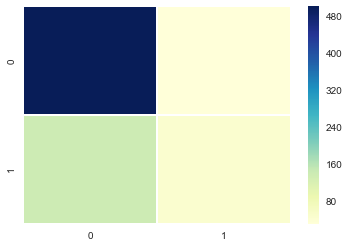

In [55]:
y_pred = model.predict_classes(df_features_val)
data = confusion_matrix(y_val, y_pred)

print(data)

sns.heatmap(np.sqrt(data), 
            #annot=True, fmt="f", 
            linewidths=.5, cmap="YlGnBu");

<h1>Ideen für neue Ansätze</h1>

- Anstelle von random over oder undersampling könnte man zu allen positiven hits (hier evtl. die zwite Runde Screening mit einbeziehen um die wirkich positiven nur zum lernen zu nehmen) diejenigen negativen nehmen, die beim vergleich des Fingerprints eine hohe Ähnlichkeit aufweisen. So könnten im zweiten Schritt wirklich nur die (feinen) Unterschiede gelernt werden.